# Business Understanding

## Introduction

The telecom company has provided access to three different datasets for a classification project. The first dataset consists of 3000 records and is stored in a remote database hosted on Microsoft SQL Server. The second dataset contains 2000 records and is stored on OneDrive. The third dataset is hosted on a GitHub repository.

## Objectives of the project

To assist the telecom company understand their data: The project aims to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, the project aims to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The project involves developing a predictive model to determine whether a customer is likely to churn or not. By using machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., the project aims to build a model that accurately predicts customer churn.

## Methodology

To achieve these objectives, the project will follow the CRISP-DM framework and involve the following steps:

Data exploration: Explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide an initial understanding of the data and help identify any data quality issues.

Missing value computations: Identify missing values in the datasets and decide on an appropriate strategy for handling them, such as imputation or removal of missing data points.

Feature engineering: Perform feature engineering to transform and create new variables that can potentially improve the predictive power of the models. This step may involve encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: Utilize machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. Train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: Evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: Fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

## Hypothesis
H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Understanding

## Load Datasets

In [3]:
# Import necessary libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
# Prediction
from sklearn.metrics import confusion_matrix

In [4]:
# Establish a connection
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)


### Load first dataset (database file)

In [5]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)


In [6]:
# Close connection
conn.close()


### Load second dataset (test file)

In [7]:
# Read the excel file into a pandas dataframe
df_test = pd.read_excel('Telco-churn-second-2000.xlsx')


### Load third dataset (csv file)

In [8]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Data Exploration

## Preprocessing

In [9]:
# View the datasets (df_db)
df_db

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [68]:
# View the datasets (df_csv)
df_csv

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [69]:
# View the datasets (df_test)
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,1,0,0,0,12,1,1,1,0,0,0,0,1,0,1,1,0,84.45,1059.55
1,4568-TTZRT,1,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,20.40,181.80
2,9513-DXHDA,1,0,0,0,27,1,0,1,1,0,1,1,1,1,0,0,0,81.70,2212.55
3,2640-PMGFL,1,0,0,1,27,1,1,1,0,0,0,1,0,0,1,1,0,79.50,2180.55
4,3801-HMYNL,1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,0,0,0,0,7,1,1,1,0,0,0,0,0,0,1,1,1,75.10,552.95
1996,3557-HTYWR,0,0,0,0,47,1,1,1,1,1,0,1,0,1,0,0,0,74.05,3496.30
1997,4816-JBHOV,1,1,0,0,2,1,0,1,0,0,0,0,0,0,1,1,0,44.70,93.70
1998,8920-NAVAY,1,1,0,0,62,1,1,1,0,1,1,1,1,1,0,1,1,110.75,7053.35


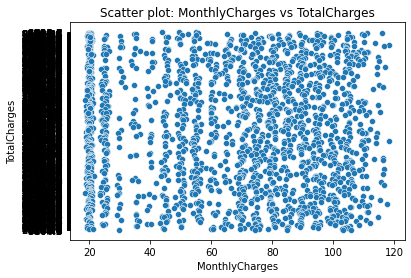

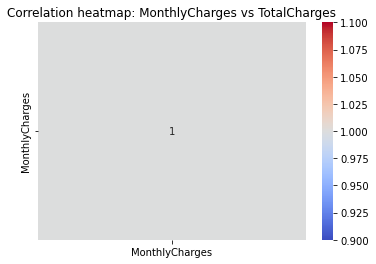

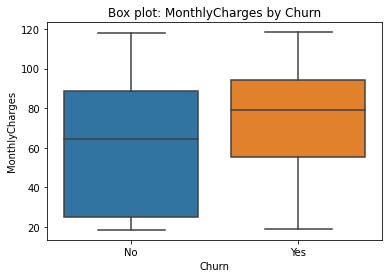

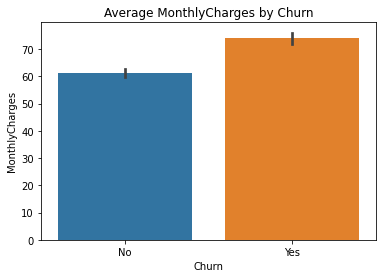

In [42]:
# Scatter plot
sns.scatterplot(data=df_csv, x='MonthlyCharges', y='TotalCharges')
plt.title('Scatter plot: MonthlyCharges vs TotalCharges')
plt.show()

# Correlation heatmap
sns.heatmap(df_csv[['MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap: MonthlyCharges vs TotalCharges')
plt.show()

# Box plot
sns.boxplot(data=df_csv, x='Churn', y='MonthlyCharges')
plt.title('Box plot: MonthlyCharges by Churn')
plt.show()

# Bar plot
sns.barplot(data=df_csv, x='Churn', y='MonthlyCharges')
plt.title('Average MonthlyCharges by Churn')
plt.show()


## Analyze the distribution of the target variable ('Churn') in both df_db and df_csv


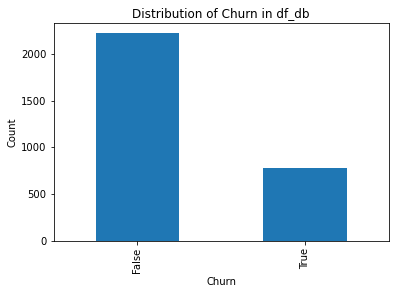

In [43]:
# Analyze target variable distribution in df_db
df_db['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn in df_db')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

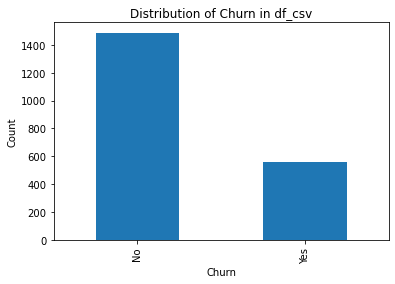

In [44]:
# Analyze target variable distribution in df_csv
df_csv['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn in df_csv')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [45]:
# convert the values "False" and "True" in df_db to 0 and 1 respectively
df_db['Churn'] = df_db['Churn'].replace({'False': 0, 'True': 1})

# convert the values "No" and "Yes" in df_db to 0 and 1 respectively


## Merge df_db1 and df_csv into df_train

### Check columns in the two datasets and perform necessary transformations for merging

In [46]:
df_db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [47]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [48]:
# Merged df_db and df_csv into df_train
df_train = pd.concat([df_db1, df_csv], ignore_index=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [49]:
# Convert TotalCharges to float type
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [50]:
# Check for missing values in df_train
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [51]:
missing_rows = df_train[df_train['TotalCharges'].isnull()]
print(missing_rows)



      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3218  2923-ARZLG    Male              0     Yes        Yes       0   
4670  4075-WKNIU  Female              0     Yes        Yes       0   
4754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
3218          Yes            No              No  No internet service  ...   
4670          Yes           Yes             DSL                   No  ...   
4754          Yes           Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
3218  No internet service  No internet service  No internet service   
4670                  Yes                  Yes                  Yes   
4754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
3218  No internet service  One year              Yes   
4670         

In [52]:
# Impute the missing values in TotalCharges using the median
median_total_charges = df_train['TotalCharges'].median()
df_train['TotalCharges'] = df_train['TotalCharges'].fillna(median_total_charges)

In [53]:
# Check uniqueness of non-numeric columns
 
# List of columns to get unique values from
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

# Iterate over the columns and print unique values
for column in non_numeric_columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

Unique values in column gender:
['Female' 'Male']

Unique values in column SeniorCitizen:
[0 1]

Unique values in column Partner:
[True False 'No' 'Yes']

Unique values in column Dependents:
[False True 'No' 'Yes']

Unique values in column PhoneService:
[False True 'Yes' 'No']

Unique values in column MultipleLines:
[False True 'No' 'No phone service' 'Yes']

Unique values in column InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in column OnlineSecurity:
[False True 'No' 'Yes' 'No internet service']

Unique values in column OnlineBackup:
[True False 'No' 'Yes' 'No internet service']

Unique values in column DeviceProtection:
[False True 'No' 'Yes' 'No internet service']

Unique values in column TechSupport:
[False True 'Yes' 'No' 'No internet service']

Unique values in column StreamingTV:
[False True 'No' 'Yes' 'No internet service']

Unique values in column StreamingMovies:
[False True 'No' 'Yes' 'No internet service']

Unique values in column Contract:
['Month-to-month' 

# Encoding 

In [54]:
# Create a dictionary with the encoding scheme
encoding_scheme = {
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'Dependents': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'PhoneService': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'MultipleLines': {False: 0, True: 1, 'No': 0, 'No phone service': 0, 'Yes': 1},
    'InternetService': {'DSL': 1, 'Fiber optic': 1, 'No': 0},
    'OnlineSecurity': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'OnlineBackup': {True: 1, False: 0, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'DeviceProtection': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'TechSupport': {False: 0, True: 1, 'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'StreamingMovies': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'Contract': {'Month-to-month': 1, 'One year': 0, 'Two year': 0},
    'PaperlessBilling': {True: 1, False: 0, 'Yes': 1, 'No': 0},
    'PaymentMethod': {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1},
    'Churn': {False: 0, True: 1, 'No': 0, 'Yes': 1}
}

# Replace the values in df_train using the encoding scheme
df_train.replace(encoding_scheme, inplace=True)

# Print the unique values in each column after encoding
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()


Unique values in column customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in column gender:
[0 1]

Unique values in column SeniorCitizen:
[0 1]

Unique values in column Partner:
[1 0]

Unique values in column Dependents:
[0 1]

Unique values in column tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values in column PhoneService:
[0 1]

Unique values in column MultipleLines:
[0 1]

Unique values in column InternetService:
[1 0]

Unique values in column OnlineSecurity:
[0 1]

Unique values in column OnlineBackup:
[1 0]

Unique values in column DeviceProtection:
[0 1]

Unique values in column TechSupport:
[0 1]

Unique values in column StreamingTV:
[0 1]

Unique values in column StreamingMovies:
[0 1]

Unique values in column Contract:
[1 

In [55]:
for column in df_test.columns:
    unique_values = df_test[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()


Unique values in column customerID:
['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']

Unique values in column gender:
['Male' 'Female']

Unique values in column SeniorCitizen:
[0 1]

Unique values in column Partner:
['No' 'Yes']

Unique values in column Dependents:
['No' 'Yes']

Unique values in column tenure:
[12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]

Unique values in column PhoneService:
['Yes' 'No']

Unique values in column MultipleLines:
['Yes' 'No' 'No phone service']

Unique values in column InternetService:
['Fiber optic' 'No' 'DSL']

Unique values in column OnlineSecurity:
['No' 'No internet service' 'Yes']

Unique values in column OnlineBackup:
['No' 'No internet service' 'Yes']

Unique values in column DeviceProtection:
['No' 'No internet service' 'Yes']

Unique

In [56]:
# Create a dictionary with the encoding scheme
encoding_scheme = {
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'Dependents': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'PhoneService': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'MultipleLines': {False: 0, True: 1, 'No': 0, 'No phone service': 0, 'Yes': 1},
    'InternetService': {'DSL': 1, 'Fiber optic': 1, 'No': 0},
    'OnlineSecurity': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'OnlineBackup': {True: 1, False: 0, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'DeviceProtection': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'TechSupport': {False: 0, True: 1, 'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'StreamingMovies': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'Contract': {'Month-to-month': 1, 'One year': 0, 'Two year': 0},
    'PaperlessBilling': {True: 1, False: 0, 'Yes': 1, 'No': 0},
    'PaymentMethod': {'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}
}

# Replace the values in df_test using the encoding scheme
df_test.replace(encoding_scheme, inplace=True)

# Print the unique values in each column after encoding
for column in df_test.columns:
    unique_values = df_test[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()


Unique values in column customerID:
['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']

Unique values in column gender:
[1 0]

Unique values in column SeniorCitizen:
[0 1]

Unique values in column Partner:
[0 1]

Unique values in column Dependents:
[0 1]

Unique values in column tenure:
[12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]

Unique values in column PhoneService:
[1 0]

Unique values in column MultipleLines:
[1 0]

Unique values in column InternetService:
[1 0]

Unique values in column OnlineSecurity:
[0 1]

Unique values in column OnlineBackup:
[0 1]

Unique values in column DeviceProtection:
[0 1]

Unique values in column TechSupport:
[0 1]

Unique values in column StreamingTV:
[1 0]

Unique values in column StreamingMovies:
[0 1]

Unique values in column Contract:
[1 

# Feature Engineering

In [57]:
# Split the df_train dataset into features (X_train) and the target variable (y_train). The target variable in this case is "Churn".
X_train = df_train.drop("Churn", axis=1)
y_train = df_train["Churn"]


In [58]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,29.850000,29.850000
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,0,56.950001,1889.500000
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,0,53.849998,108.150002
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,0,0,1,42.299999,1840.750000
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,0,70.699997,151.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,0,1,0,84.800000,1990.500000
5039,2234-XADUH,0,0,1,1,72,1,1,1,0,1,1,0,1,1,0,1,1,103.200000,7362.900000
5040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,1,1,0,29.600000,346.450000
5041,8361-LTMKD,1,1,1,0,4,1,1,1,0,0,0,0,0,0,1,1,0,74.400000,306.600000


In [59]:
X_train = X_train.drop('customerID', axis=1)



In [60]:
y_train

0       0
1       0
2       1
3       0
4       1
       ..
5038    0
5039    0
5040    0
5041    1
5042    0
Name: Churn, Length: 5043, dtype: int64

In [61]:
# Select the features for X_test
X_test = df_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaperlessBilling', 'PaymentMethod']]

# Encode the categorical variables in X_test
X_test_encoded = X_test.replace({
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'Dependents': {False: 0, True: 1, 'No': 0, 'Yes': 1},
    'PhoneService': {False: 0, True: 1, 'Yes': 1, 'No': 0},
    'MultipleLines': {False: 0, True: 1, 'No': 0, 'No phone service': 0, 'Yes': 1},
    'InternetService': {'DSL': 1, 'Fiber optic': 1, 'No': 0},
    'OnlineSecurity': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'OnlineBackup': {True: 1, False: 0, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'DeviceProtection': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'TechSupport': {False: 0, True: 1, 'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'StreamingMovies': {False: 0, True: 1, 'No': 0, 'Yes': 1, 'No internet service': 0},
    'Contract': {'Month-to-month': 1, 'One year': 0, 'Two year': 0},
    'PaperlessBilling': {True: 1, False: 0, 'Yes': 1, 'No': 0},
    'PaymentMethod': {'Electronic check': 0, 'Mailed check': 0,
                      'Bank transfer (automatic)': 1, 'Credit card (automatic)': 1}
})

# Print the unique values in each column of X_test_encoded
for column in X_test_encoded.columns:
    print(f"Unique values in column {column}:")
    print(X_test_encoded[column].unique())
    print()


Unique values in column gender:
[1 0]

Unique values in column SeniorCitizen:
[0 1]

Unique values in column Partner:
[0 1]

Unique values in column Dependents:
[0 1]

Unique values in column PhoneService:
[1 0]

Unique values in column MultipleLines:
[1 0]

Unique values in column InternetService:
[1 0]

Unique values in column OnlineSecurity:
[0 1]

Unique values in column OnlineBackup:
[0 1]

Unique values in column DeviceProtection:
[0 1]

Unique values in column TechSupport:
[0 1]

Unique values in column StreamingTV:
[1 0]

Unique values in column StreamingMovies:
[0 1]

Unique values in column Contract:
[1 0]

Unique values in column PaperlessBilling:
[1 0]

Unique values in column PaymentMethod:
[0 1]



In [62]:
print(X_train.columns)
print(X_test.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [63]:
X_test = df_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [64]:
# Get the common set of column names
common_columns = X_train.columns.intersection(X_test.columns)

# Reindex X_test to align the columns
X_test = X_test.reindex(columns=common_columns)


In [65]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Extract the correlation values for the "Churn" column
churn_corr = corr_matrix['Churn'].drop('Churn')  # Drop the correlation with itself

# Sort the correlation values in descending order
churn_corr_sorted = churn_corr.abs().sort_values(ascending=False)

# Display the correlations
print(churn_corr_sorted)

Contract            0.412365
tenure              0.350861
InternetService     0.230149
MonthlyCharges      0.202089
PaymentMethod       0.199917
TotalCharges        0.194341
PaperlessBilling    0.193345
Dependents          0.171597
TechSupport         0.171334
OnlineSecurity      0.170280
SeniorCitizen       0.149892
Partner             0.141300
OnlineBackup        0.085018
DeviceProtection    0.065209
StreamingTV         0.064369
StreamingMovies     0.047263
MultipleLines       0.040680
PhoneService        0.014497
gender              0.002638
Name: Churn, dtype: float64


# Modelling

In [66]:
# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Define a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC())
]

# Iterate over the models and evaluate their performance
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the evaluation results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---------------------------------------")

ValueError: X has 17 features, but LogisticRegression is expecting 19 features as input.